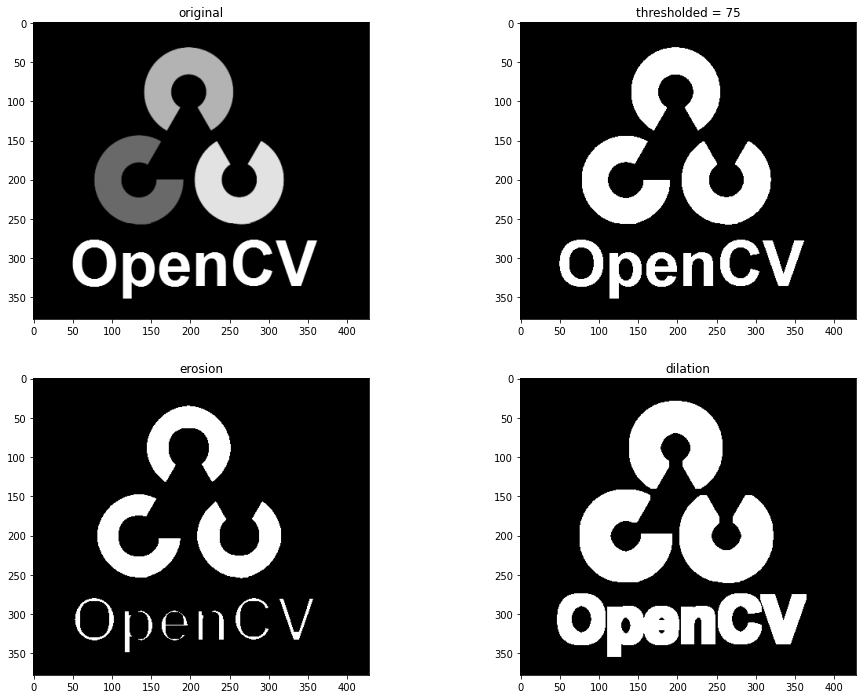

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in the greyscale
img = cv2.imread('opencv_logo.png', cv2.IMREAD_GRAYSCALE)
img = 255 - img

# threshold the image
ret1, thresh1 = cv2.threshold(img, 75, 255, cv2.THRESH_BINARY)

# Following are the two methods by which we can construct
# the structuring element
 
# Method-1: using numpy
kernel_1 = np.ones((3,3), dtype='uint8')

# Method-2: using opencv getStructuringElement() function
kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

# Apply the erosion function (Erode the white part = Dilate the black part)
# Erosion is useful in removing salt noise but also shrink the foreground region at the same time.
# If holes or gaps (black part) are present in the object, this tends to amplify them.
erosion = cv2.erode(thresh1, kernel_2, iterations = 3)

# Apply the dilation function (Dilate the white part = Erode the black part)
# Dilation is useful in removing pepper noise.
# If holes or gaps (black part) are present in the object, this tends to fill the holes or bridge the gaps.
dilation = cv2.dilate(thresh1, kernel_2, iterations = 3)

plt.subplot(2,2,1)
plt.title("original")
plt.imshow(img, cmap ='gray')

plt.subplot(2,2,2)
plt.title("thresholded = 75")
plt.imshow(thresh1, cmap ='gray')

plt.subplot(2,2,3)
plt.title("erosion")
plt.imshow(erosion, cmap ='gray')

plt.subplot(2,2,4)
plt.title("dilation")
plt.imshow(dilation, cmap ='gray')

plt.gcf().set_size_inches(16, 12)
plt.show()